In [2]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]
scipy: 1.5.2
numpy: 1.19.2
matplotlib: 3.3.2
pandas: 1.1.3
sklearn: 0.23.2


In [14]:
#load libraries
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


#open dataset
df=pd.read_csv("cancerpatientdata.csv",index_col=0)
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
Patient Id,,,,,,,,,,,,,,,,,,,,,
P1,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
P10,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
P100,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
P1000,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
P101,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [15]:
df.shape

(1000, 24)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, P1 to P999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                   10

In [17]:
#checking the dataset for any NaN,null or missing values
df.isna().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [18]:
#checking levels of genetic risk (Considerably important feature in determining and predicting cancer risk)

df['Genetic Risk'].value_counts()

7    327
2    212
3    173
6    108
5    100
4     40
1     40
Name: Genetic Risk, dtype: int64

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genetic Risk', ylabel='count'>

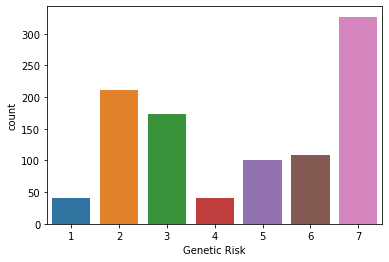

In [19]:
sns.countplot(df['Genetic Risk'])

In [20]:
df['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Level', ylabel='count'>

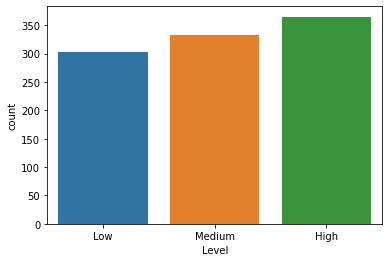

In [21]:
sns.countplot(df['Level'])

In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
labelencoder_Y.fit_transform(df.iloc[:,0].values)

array([14,  1, 16, 18, 25, 16, 30, 10, 16, 25, 23, 37, 20, 15,  9, 39,  1,
       15, 17,  0,  6, 31, 35, 11, 17, 38, 19,  3, 14, 10, 16, 21, 13, 14,
        7,  0,  9, 10, 13, 24,  9,  8, 27,  1,  4, 21,  6, 16,  6, 19,  2,
        5,  6, 16, 19, 26, 30, 31, 23, 19, 35, 34, 33, 24, 19, 23, 24, 14,
       35, 13, 23, 35, 19, 14,  4, 16,  5, 27, 25, 11, 30, 30, 27, 17, 12,
       19, 16, 23, 14, 24, 38, 31, 16, 25,  9,  8, 18, 10,  3, 11, 20, 19,
       28, 18,  8, 18, 14, 23, 18,  7,  2, 26,  7,  3,  8, 18, 16, 14,  7,
       16,  9, 27, 37, 20, 14,  9, 39,  1, 15, 17,  0,  6, 31, 35, 11, 10,
       38, 19,  3, 14, 10, 16, 21, 13, 14,  7, 16,  9, 10, 13, 24,  9,  8,
       27,  1,  4, 21, 21, 16,  6, 19,  2,  5,  6, 16, 19, 26, 30, 13, 23,
       19, 35, 34, 33, 24, 19, 23, 24, 14, 14, 13, 23, 35, 19, 14,  4, 16,
        5, 27, 25,  7, 30, 30, 27, 17, 12, 19, 16, 23, 14, 24,  9, 31, 16,
       25,  9,  8, 18, 10,  3, 11, 20, 10, 28, 18,  8, 18, 14, 23, 18,  7,
        2, 26, 16, 13,  8

In [23]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [25]:
df.corr()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.053006,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.146505,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.607829,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.667612,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.625291,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.645947,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.632236,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.602987,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.745054,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.814805,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422


<AxesSubplot:>

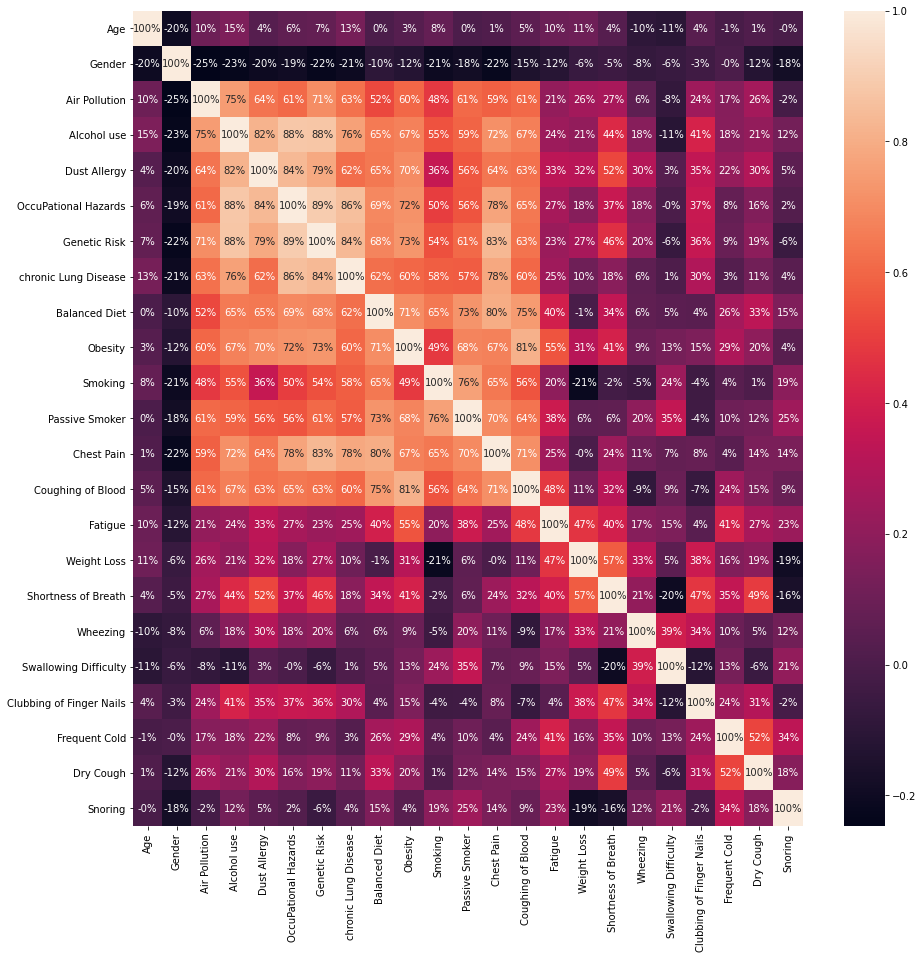

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True, fmt='.0%')

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Air Pollution'}>,
        <AxesSubplot:title={'center':'Alcohol use'}>,
        <AxesSubplot:title={'center':'Dust Allergy'}>],
       [<AxesSubplot:title={'center':'OccuPational Hazards'}>,
        <AxesSubplot:title={'center':'Genetic Risk'}>,
        <AxesSubplot:title={'center':'chronic Lung Disease'}>,
        <AxesSubplot:title={'center':'Balanced Diet'}>,
        <AxesSubplot:title={'center':'Obesity'}>],
       [<AxesSubplot:title={'center':'Smoking'}>,
        <AxesSubplot:title={'center':'Passive Smoker'}>,
        <AxesSubplot:title={'center':'Chest Pain'}>,
        <AxesSubplot:title={'center':'Coughing of Blood'}>,
        <AxesSubplot:title={'center':'Fatigue'}>],
       [<AxesSubplot:title={'center':'Weight Loss'}>,
        <AxesSubplot:title={'center':'Shortness of Breath'}>,
        <AxesSubplot:title={'center':'Wheezing'}>,
        <Axes

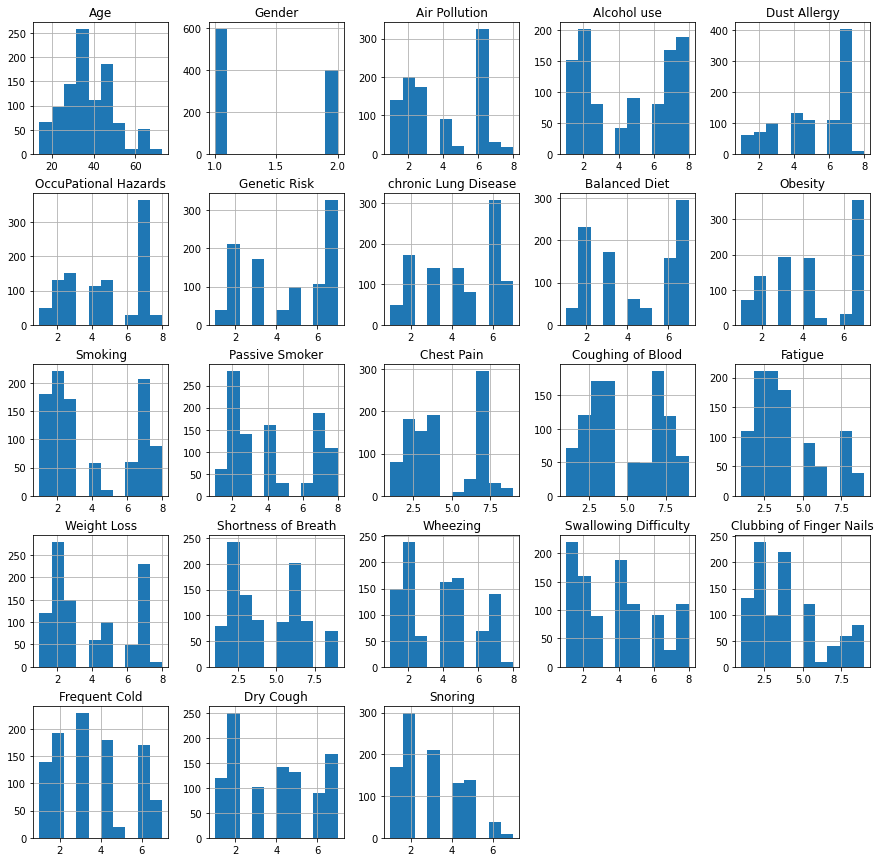

In [27]:
#Present the variables in histogram form to check whether there are any Gausssian distributions

df.hist(figsize=(15,15))


In [28]:
df.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [39]:
#Create a training/ testing set at 80%/20% split

X=df.iloc[:,1:12].values
Y=df.iloc[:,12].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state = 1)

In [40]:
#Scale the data (Feature scaling)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()
lr.fit(X_train, Y_train)
prediction = lr.predict(X_test)

lr_train_acc = accuracy_score(Y_train, lr.predict(X_train))
lr_test_acc = accuracy_score(Y_test, prediction)

print(f"Training Accuracy of Logistic Regression Model is {lr_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {lr_test_acc}")

Training Accuracy of Logistic Regression Model is 0.88125
Test Accuracy of Logistic Regression Model is 0.86


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
# confusion matrix 
confusion_matrix(Y_test, prediction)

array([[ 5,  5,  4,  0,  0,  0,  0,  0],
       [ 1, 36,  0,  0,  0,  0,  0,  0],
       [ 4,  0, 23,  4,  0,  0,  0,  0],
       [ 0,  0,  2, 33,  0,  0,  0,  0],
       [ 0,  0,  0,  5,  7,  3,  0,  0],
       [ 0,  0,  0,  0,  0, 59,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  8]])

In [87]:
# classification report
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           1       0.50      0.36      0.42        14
           2       0.88      0.97      0.92        37
           3       0.79      0.74      0.77        31
           4       0.79      0.94      0.86        35
           6       1.00      0.47      0.64        15
           7       0.95      1.00      0.98        59
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         8

    accuracy                           0.86       200
   macro avg       0.86      0.81      0.82       200
weighted avg       0.86      0.86      0.85       200



In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

prediction = knn.predict(X_test)

knn_train_acc = accuracy_score(Y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(Y_test, prediction)

print(f"Training Accuracy of KNN Model is {knn_train_acc}")
print(f"Test Accuracy of KNN Model is {knn_test_acc}")

Training Accuracy of KNN Model is 0.9925
Test Accuracy of KNN Model is 0.97


In [90]:
# confusion matrix 
confusion_matrix(Y_test, prediction)

array([[14,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  2,  0,  0,  0,  0,  0],
       [ 0,  1, 30,  0,  0,  0,  0,  0],
       [ 1,  0,  2, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 59,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  8]])

In [91]:
# classification report
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.97      0.95      0.96        37
           3       0.88      0.97      0.92        31
           4       1.00      0.91      0.96        35
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        59
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         8

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.97      0.97      0.97       200



In [92]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

prediction = dtc.predict(X_test)

dtc_train_acc = accuracy_score(Y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(Y_test, prediction)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

Training Accuracy of Decision Tree Model is 1.0
Test Accuracy of Decision Tree Model is 0.995


In [93]:
# confusion matrix
confusion_matrix(Y_test, prediction)

array([[14,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  1,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 59,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  8]])

In [94]:
# classification report
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        37
           3       1.00      0.97      0.98        31
           4       1.00      1.00      1.00        35
           6       0.94      1.00      0.97        15
           7       1.00      1.00      1.00        59
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         8

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [96]:
#Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

nb=GaussianNB()
nb.fit(X_train,Y_train)

prediction = nb.predict(X_test)

nb_train_acc = accuracy_score(Y_train, nb.predict(X_train))
nb_test_acc = accuracy_score(Y_test, prediction)

print(f"Training Accuracy of Naive Bayes Model is {nb_train_acc}")
print(f"Test Accuracy of Naive Bayes Model is {nb_test_acc}")


Training Accuracy of Naive Bayes Model is 0.83125
Test Accuracy of Naive Bayes Model is 0.75
